<a href="https://colab.research.google.com/github/EvoDmiK/TIL/blob/main/AI_study/basic/pytorch/0.basics/0.2.pytorch_geometric_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **0. 참고자료**
## **0-1. 도서**
## **0-2. 논문, 학술지**
## **0-3. 웹 사이트**

- 아기여우의 자기계발 블로그 : Graph Neural Networks (GNN) / 그래프 뉴럴 네트워크 기초 개념 정리 | [[블로그 링크]](https://littlefoxdiary.tistory.com/16)


- Seongsu : 예제를 통해 알아보는 PyTorch Geometric 5 Basic Concepts | [[블로그 링크]](https://baeseongsu.github.io/posts/pytorch-geometric-introduction/)

## **0-4. 데이터셋 출처**

# **1. GNN (Graph Neural Network)이란**
## **1-1. GNN을 알기 전에 Graph란**
- 그래프(Graph)는 노드와 간선으로 이루어진 구조  
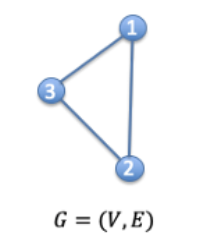

- 수학적으로 그래프 G는 노드 집합 V와 간선 집합 E로 구성된다.
  - 간선 집합 E의 원소 간선 e는 두 개의 노드로 이루어진 순서가 있는 쌍이다.
  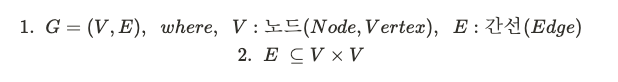


### **1) 그래프 데이터 핸들링**
- Pytorch Geometric에서 하나의 그래프는 torch_geometric.data.Data라는 클래스로 표현되고, 다음과 같은 인자를 받는다.  
⚠️ 아래의 인자값들은 옵션으로, 자신이 구성하고 싶은 속성을 다양하게 모델링 할 수 있다.

|인자값|설명|
|:--|:--|
|x|노드의 특징 행렬|
|edge_index|그래프의 연결성 (인접행렬)|
|edge_attr|엣지 특징 행렬|
|y|target 값|
|pos| 노드 위치 행렬|



In [1]:
!nvcc -V
!python -V

import torch
torch.__version__

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Feb_14_21:12:58_PST_2021
Cuda compilation tools, release 11.2, V11.2.152
Build cuda_11.2.r11.2/compiler.29618528_0
Python 3.7.15


'1.12.1+cu113'

In [2]:
!pip install torch_geometric
!pip install https://data.pyg.org/whl/torch-1.12.0%2Bcu113/torch_sparse-0.6.15-cp37-cp37m-linux_x86_64.whl
!pip install https://data.pyg.org/whl/torch-1.12.0%2Bcu113/torch_scatter-2.0.9-cp37-cp37m-linux_x86_64.whl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 467 kB 4.7 MB/s 
  Created wheel for torch-geometric: filename=torch_geometric-2.1.0.post1-py3-none-any.whl size=689859 sha256=b02b5cae98f76d0a1252e3fc1d51a17e17101a8cfa4d0eb6f88bd09377d6e17f
  Stored in directory: /root/.cache/pip/wheels/d1/cb/43/f7f2e472de4d7cff31bceddadc36d634e1e545fbc17961c282
Successfully built torch-geometric
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.5 MB 5.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.9 MB 5.2 MB/s 


In [3]:
from torch_geometric.data import Data

- Data를 통해 그래프를 정의하는 방법은 두 가지가 있다.  
  1) n x 2 형태의 텐서로 정의하는 방법  
  2) (v1, v2) 순서 쌍으로 정의하는 방법  
     -> edge_index를 전치 시킨 후, contiguous()함수를 통해 1)번과 같은 형태로 만든다.

In [5]:
edge_idx = torch.tensor([[0, 1, 1, 2],
                         [1, 0, 2, 1]], dtype = torch.long)

x    = torch.tensor([[-1], [0], [1]], dtype = torch.float)
data = Data(x = x, edge_index = edge_idx)

data

Data(x=[3, 1], edge_index=[2, 4])

In [6]:
## 그래프의 연결 정보. 0 <->1 <-> 2 이렇게 연결되어 있는 그래프이다.
edge_idx = torch.tensor([[0, 1],
                         [1, 0],
                         [1, 2],
                         [2, 1]], dtype = torch.long)

## 노드들의 특징 행렬
x    = torch.tensor([[-1], [0], [1]], dtype = torch.float)
data = Data(x = x, edge_index = edge_idx.t().contiguous()) 

data

Data(x=[3, 1], edge_index=[2, 4])

- torch_geometric.data.Data는 다음과 같은 함수도 제공한다.
  
|함수명|설명|
|:--|:--|
|data.keys|해당 속성 이름|
|data.num_nodes|총 노드 개수|
|data.num_edges|총 엣지 개수|
|data.has_isolated_nodes()|고립 노드 여부 확인|
|data.has_self_loops()|셀프 루프 포함 여부 확인|
|data.is_directed()|그래프의 방향성 여부 확인|

In [7]:
print(f'data keys       : {data.keys} \nnumber of nodes : {data.num_nodes} \nnumber of edges : {data.num_edges}\n')
print(f'has isolated nodes? : {data.has_isolated_nodes()}')
print(f'has self loops?     : {data.has_self_loops()}')
print(f'is graph directed?  : {data.is_directed()}')


data keys       : ['edge_index', 'x'] 
number of nodes : 3 
number of edges : 4

has isolated nodes? : False
has self loops?     : False
is graph directed?  : False
